In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
feature_names = data.feature_names
print(feature_names)
print(X.shape)
print(y.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
(569,)


In [4]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
print(df[['mean radius', 'mean texture', 'target', 'diagnosis']].head(10))

   mean radius  mean texture  target  diagnosis
0        17.99         10.38       0  Malignant
1        20.57         17.77       0  Malignant
2        19.69         21.25       0  Malignant
3        11.42         20.39       0  Malignant
4        20.29         14.34       0  Malignant
5        12.45         15.70       0  Malignant
6        18.25         19.98       0  Malignant
7        13.71         20.83       0  Malignant
8        13.00         21.83       0  Malignant
9        12.46         24.05       0  Malignant


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
print(y_proba[:5])

[[1.13590250e-01 8.86409750e-01]
 [9.99990991e-01 9.00936206e-06]
 [9.96920905e-01 3.07909541e-03]
 [5.10134225e-04 9.99489866e-01]
 [6.06389713e-05 9.99939361e-01]]


0.9736842105263158
[[41  2]
 [ 1 70]]


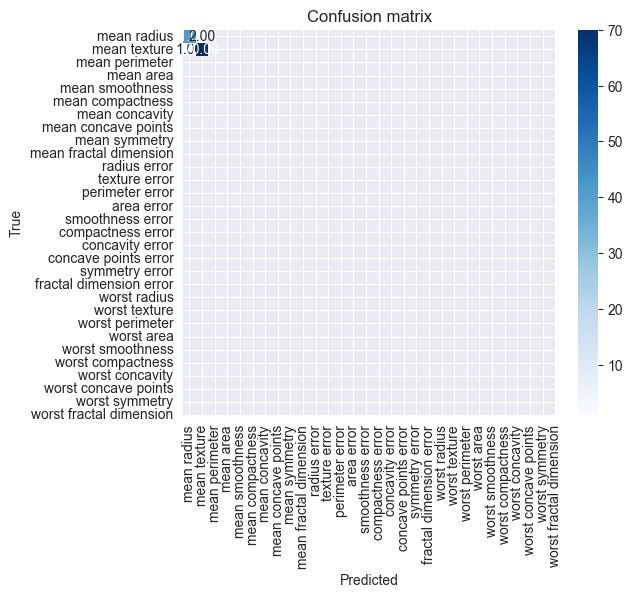

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=True, fmt=".2f", cbar=True, cmap="Blues", xticklabels=feature_names, yticklabels=feature_names)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



                    feature  coefficient
15        compactness error     0.682491
19  fractal dimension error     0.616230
5          mean compactness     0.540164
18           symmetry error     0.500425
8             mean symmetry     0.236119
11            texture error     0.188877
16          concavity error     0.175275
9    mean fractal dimension     0.075921
25        worst compactness     0.016110
4           mean smoothness    -0.071667


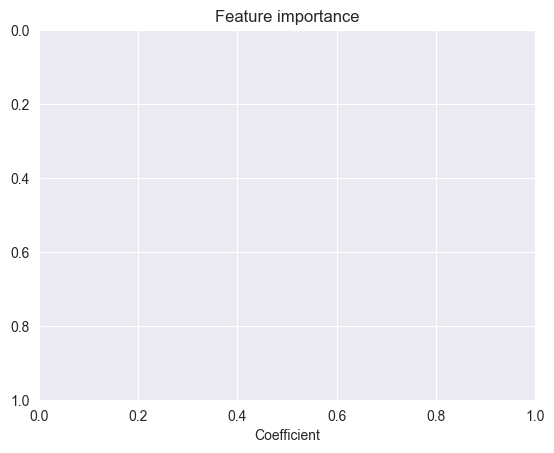

In [14]:
coefficients = model.coef_[0]
feature_imp = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients}).sort_values(by='coefficient', ascending=False)
print(feature_imp.head(10))
top10 = feature_imp.head(10)
plt.figure()
plt.title('Feature importance')
plt.xlabel('Coefficient')
plt.gca().invert_yaxis()
plt.show()